In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [81]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [82]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [83]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [84]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [85]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [87]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [88]:
lab_enc = LabelEncoder()
ord_enc = OrdinalEncoder()

In [89]:
df['Name'] = lab_enc.fit_transform(df['Name'])


ord_enc = OrdinalEncoder(categories=[["male", "female"]])
df['Sex'] = ord_enc.fit_transform(df[['Sex']])

df['Ticket'] = lab_enc.fit_transform(df['Ticket'])

df['Cabin'] = lab_enc.fit_transform(df['Cabin'])

df['Embarked'] = lab_enc.fit_transform(df['Embarked'])

In [90]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [91]:
df['Cabin'].unique()

array([147,  81,  55, 129, 145,  49, 111,  13,  63,  41, 101,  23,  71,
        21,  80, 142, 140, 122,  12,  91,  98,  52,  36, 116, 138, 107,
        45, 141,  61, 123,  18,  14,  69, 144,   9,  28,  43,   8, 103,
        93,  87,  78, 102,  83,  40, 134,  46,  57,  89,  54, 113,   3,
        31,  90,  62,  51,  74, 125,  72,  35,  76, 124,  65,  17,  56,
        85, 127, 146,  59, 104,  24, 131,  79,  47, 115, 128,  10,  50,
        53,  86, 126,  97, 117, 133,   1,  25,  64,  96,  42, 121, 106,
        39,  88,  26,  27,  20,  82,  77,   2,  48,  75,   0, 135,  29,
         4,  95, 110, 114,   5,  33,   7, 108, 132,  58,  38,  34, 109,
        32,  19, 139,  73, 120,  84,  66, 137,  15, 105,  67, 100, 118,
        92, 136, 143,  22, 112,  44,  94,  11,  16,  37, 130,  68,  99,
       119,   6,  70,  30,  60])

In [92]:
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

In [93]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [94]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

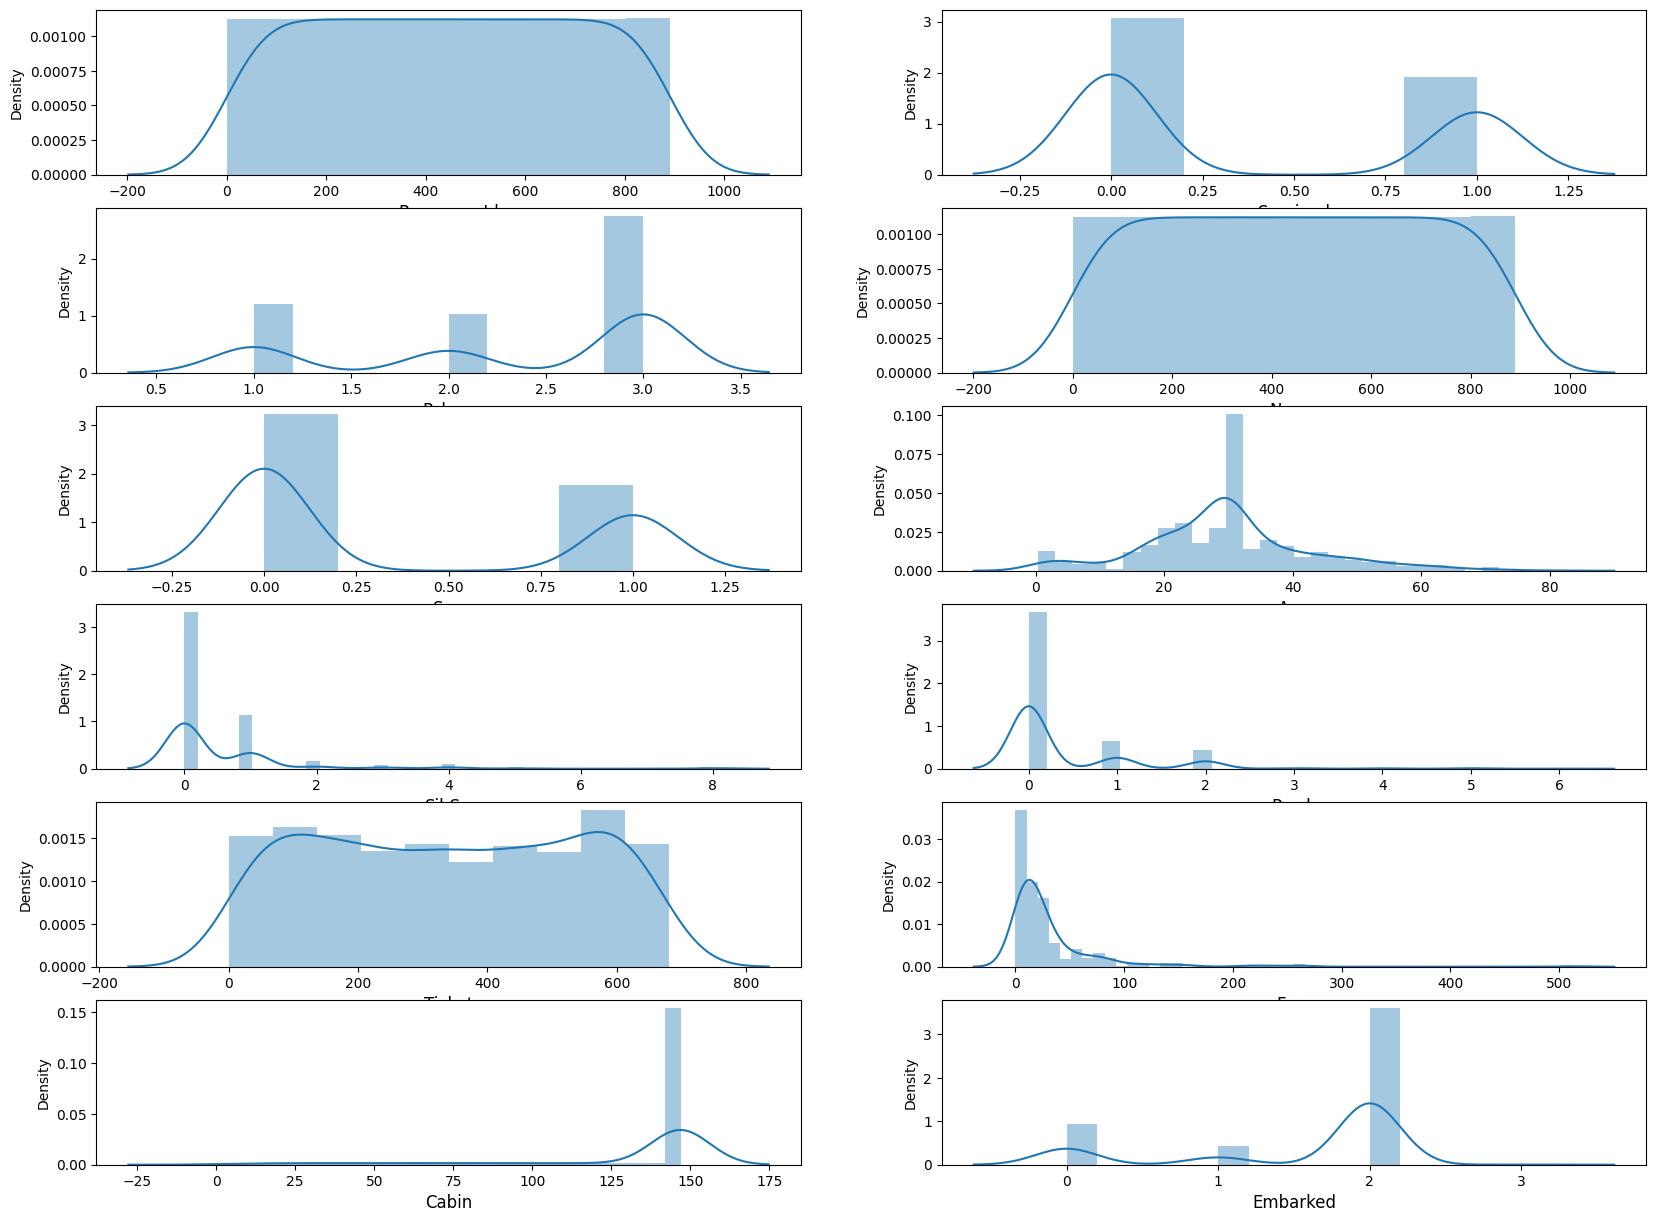

In [96]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.show()

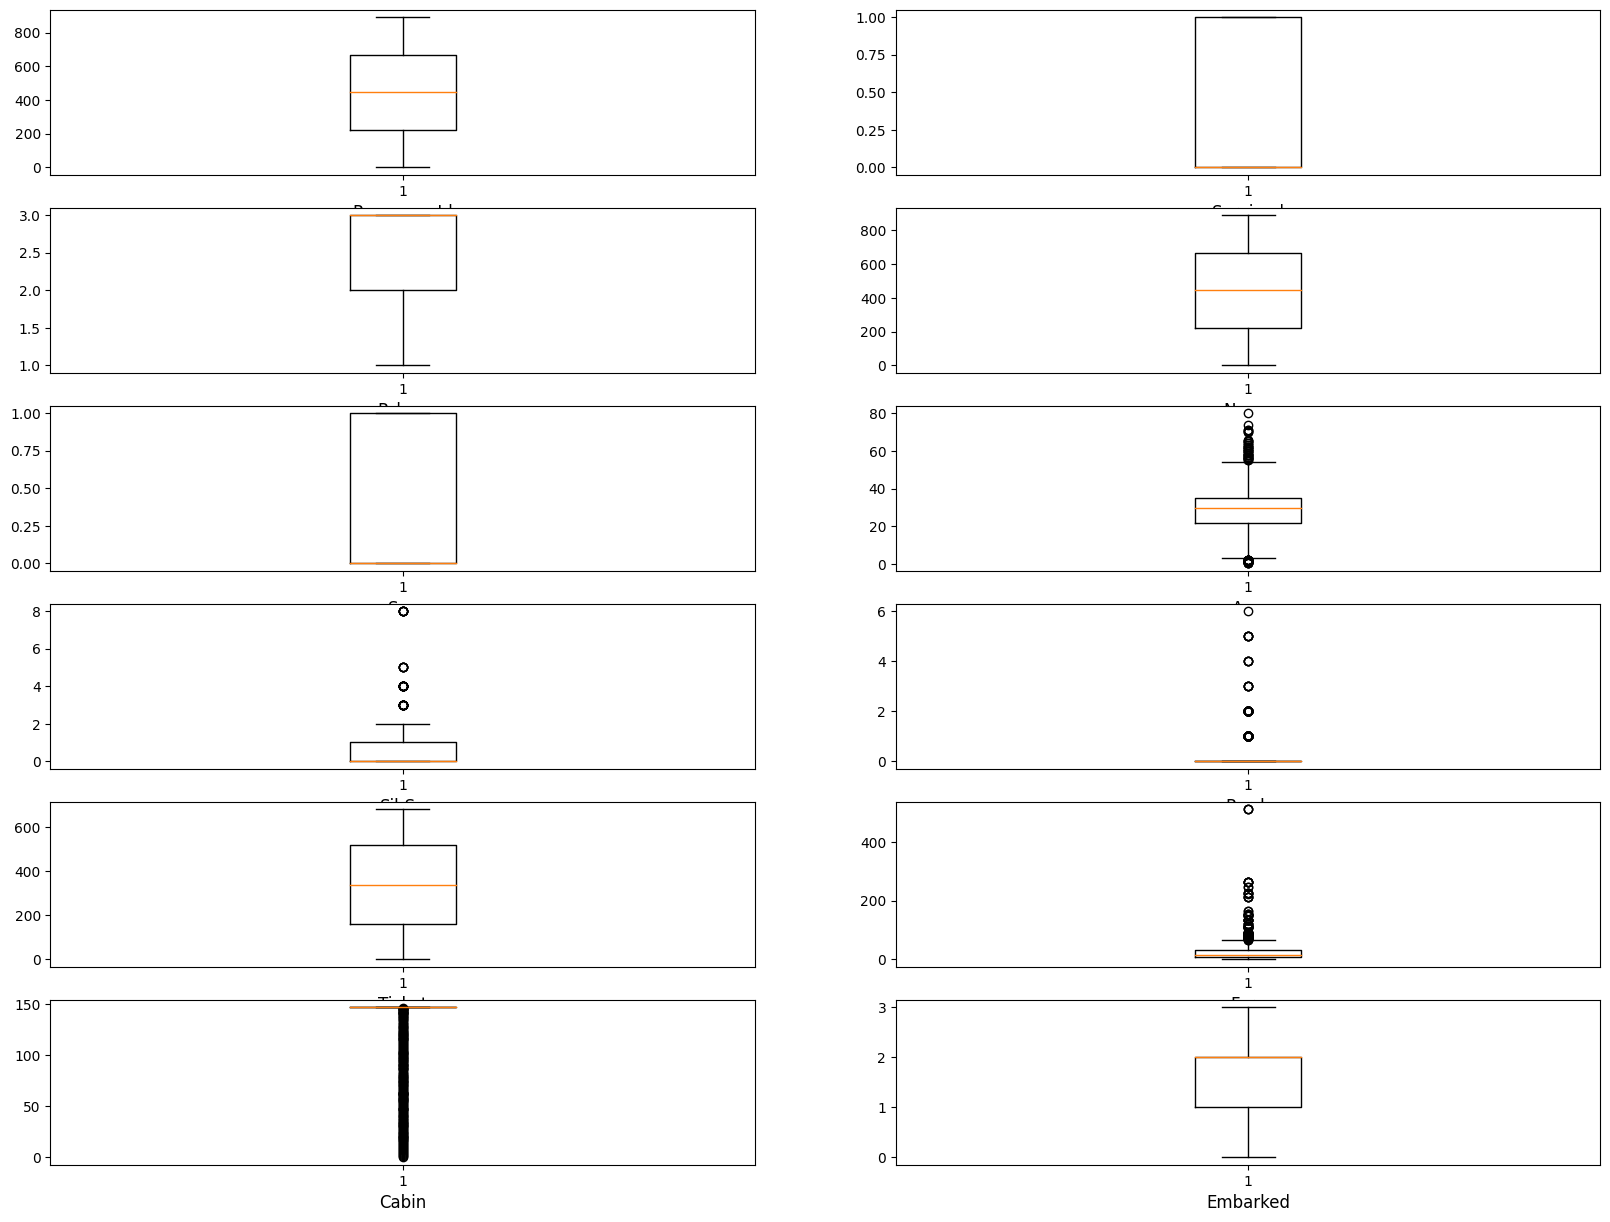

In [97]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.show()

In [98]:
q1 = df.quantile(0.25)

q3 = df.quantile(0.75)

iqr = q3 - q1

In [99]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [100]:
pclass_high  = (q3.Pclass + (1.5 * iqr.Pclass))

pclass_high

4.5

In [101]:
index = np.where(df['Pclass'] > pclass_high)

index

(array([], dtype=int64),)

In [102]:
pclass_low = (q1.Pclass - (1.5 * iqr.Pclass))

pclass_low

0.5

In [103]:
index = np.where(df['Pclass'] < pclass_low)

index

(array([], dtype=int64),)

In [104]:
age_high = (q3.Age + (1.5 * iqr.Age))

age_high

54.5

In [105]:
index = np.where(df['Age'] > age_high)

index

(array([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
        268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
        555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
        829, 851, 879]),)

In [106]:
df = df.drop(df.index[index])

df.shape

(849, 12)

In [107]:
age_low = (q1.Age - (1.5 * iqr.Age))

age_low

2.5

In [108]:
index = np.where(df['Age'] < age_low)

index

(array([  7,  14,  74, 112, 156, 163, 173, 194, 281, 289, 323, 363, 368,
        448, 458, 505, 610, 612, 717, 749, 764, 785, 788, 791]),)

In [109]:
df = df.drop(df.index[index])

df.shape

(825, 12)

In [110]:
sibsp_high = (q3.SibSp + (1.5 * iqr.SibSp))

sibsp_high

2.5

In [111]:
index = np.where(df['SibSp'] > sibsp_high)

index

(array([ 20,  23,  45,  53,  57,  62,  65,  78,  81, 147, 157, 160, 164,
        166, 183, 210, 213, 240, 245, 255, 298, 313, 345, 378, 444, 448,
        500, 501, 586, 630, 632, 671, 729, 733, 753, 759, 782, 786, 798]),)

In [112]:
df = df.drop(df.index[index])

df.shape

(786, 12)

In [113]:
sibsp_low = (q1.SibSp - (1.5 * iqr.SibSp))

sibsp_low

-1.5

In [114]:
index = np.where(df['SibSp'] < sibsp_low)

index

(array([], dtype=int64),)

In [115]:
parch_high = (q3.Parch + (1.5 * iqr.Parch))

parch_high

0.0

In [116]:
index = np.where(df['Parch'] > parch_high)

index

(array([  7,   9,  11,  20,  36,  49,  54,  71,  77,  79,  80,  84,  99,
        104, 108, 116, 120, 125, 127, 128, 132, 134, 138, 142, 143, 144,
        148, 153, 157, 162, 165, 200, 210, 211, 214, 216, 217, 221, 223,
        231, 232, 236, 254, 265, 266, 268, 272, 273, 277, 280, 281, 284,
        298, 302, 306, 310, 312, 325, 336, 340, 353, 361, 362, 364, 368,
        369, 380, 381, 382, 384, 389, 390, 392, 394, 413, 425, 432, 440,
        457, 463, 465, 466, 468, 472, 473, 478, 479, 480, 487, 496, 508,
        509, 513, 520, 522, 527, 535, 537, 542, 543, 545, 549, 560, 561,
        571, 577, 589, 596, 597, 601, 604, 606, 612, 616, 623, 634, 649,
        655, 658, 662, 663, 666, 674, 684, 689, 693, 706, 708, 709, 722,
        724, 727, 735, 747, 749, 750, 752, 753, 755, 765, 767, 775, 780,
        783]),)

In [117]:
df = df.drop(df.index[index])

df.shape

(642, 12)

In [118]:
parch_low = (q1.Parch - (1.5 * iqr.Parch))

parch_low

0.0

In [119]:
index = np.where(df['Parch'] < parch_low)

index

(array([], dtype=int64),)

In [120]:
ticket_high = (q3.Ticket + (1.5 * iqr.Ticket))

ticket_high

1061.0

In [121]:
index = np.where(df['Ticket'] > ticket_high)

index

(array([], dtype=int64),)

In [122]:
ticket_low = (q1.Ticket - (1.5 * iqr.Ticket))

ticket_low

-383.0

In [123]:
index = np.where(df['Ticket'] < ticket_low)

index

(array([], dtype=int64),)

In [124]:
fare_high = (q3.Fare + (1.5 * iqr.Fare))

fare_high

65.6344

In [125]:
index = np.where(df['Fare'] > fare_high)

index

(array([  1,  21,  23,  39,  45,  46,  52,  87, 103, 111, 150, 153, 159,
        164, 176, 181, 182, 183, 189, 204, 205, 217, 218, 221, 229, 234,
        236, 237, 261, 265, 266, 270, 274, 280, 296, 323, 347, 348, 354,
        361, 362, 376, 382, 387, 390, 398, 425, 439, 450, 460, 462, 470,
        473, 478, 490, 501, 508, 515, 527, 533, 537, 548, 553, 571, 614]),)

In [126]:
df = df.drop(df.index[index])

df.shape

(577, 12)

In [127]:
fare_low = (q1.Fare - (1.5 * iqr.Fare))

fare_low

-26.724

In [128]:
index = np.where(df['Fare'] < fare_low)

index

(array([], dtype=int64),)

In [129]:
cabin_high = (q3.Cabin + (1.5 * iqr.Cabin))

cabin_high

147.0

In [130]:
index = np.where(df['Cabin'] > cabin_high)

index

(array([], dtype=int64),)

In [131]:
cabin_low = (q1.Cabin - (1.5 * iqr.Cabin))

cabin_low

147.0

In [132]:
index = np.where(df['Cabin'] < cabin_low)

index

(array([  2,   5,  13,  15,  37,  42,  48,  61,  73,  82,  93, 112, 116,
        123, 134, 167, 179, 185, 190, 194, 197, 205, 207, 211, 215, 220,
        233, 273, 274, 278, 285, 287, 290, 293, 295, 303, 305, 327, 330,
        331, 343, 352, 363, 364, 369, 373, 384, 399, 405, 422, 428, 429,
        439, 445, 446, 451, 452, 453, 454, 457, 458, 464, 476, 480, 499,
        503, 504, 513, 519, 522, 527, 542, 551, 555, 559, 562, 574, 575]),)

In [133]:
df = df.drop(df.index[index])

df.shape

(499, 12)

In [134]:
embarked_high = (q3.Embarked + (1.5 * iqr.Embarked))

embarked_high

3.5

In [135]:
index = np.where(df['Embarked'] > embarked_high)

index

(array([], dtype=int64),)

In [136]:
embarked_low = (q1.Embarked - (1.5 * iqr.Embarked))

embarked_low

-0.5

In [137]:
index = np.where(df['Embarked'] < embarked_low)

index

(array([], dtype=int64),)

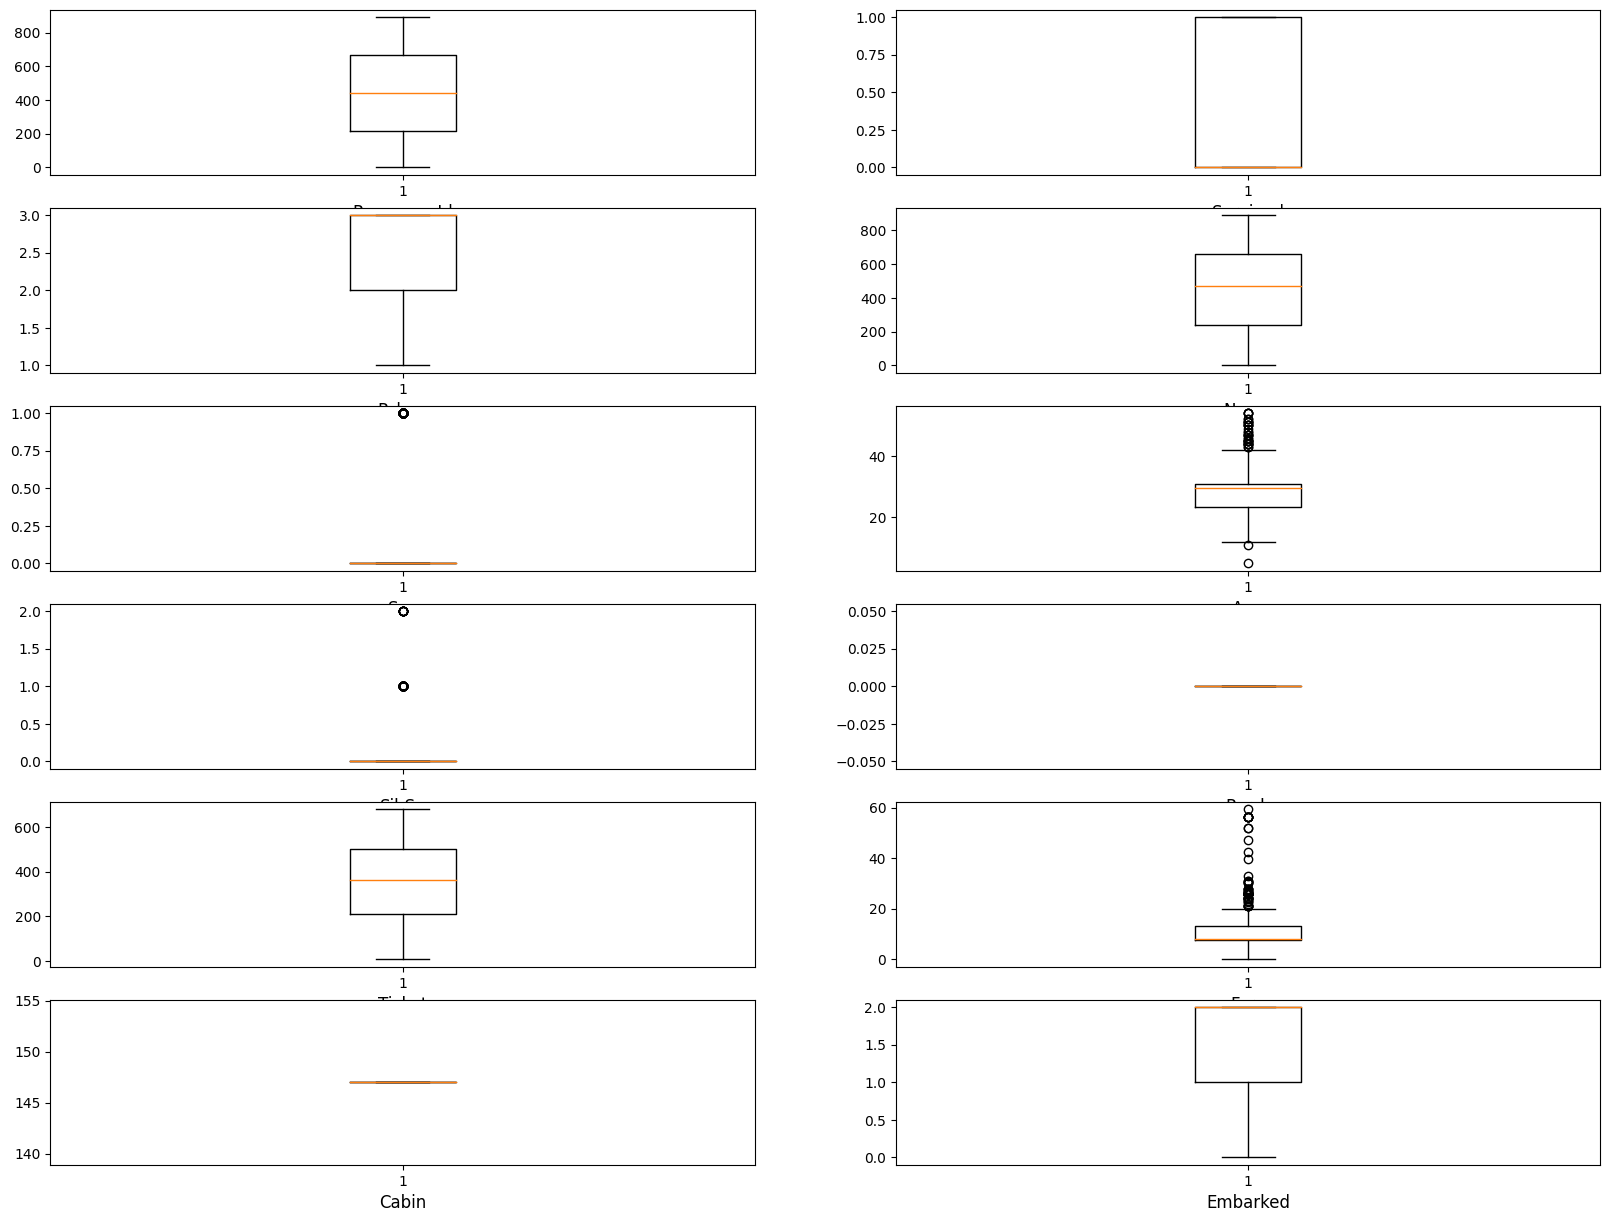

In [138]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.show()

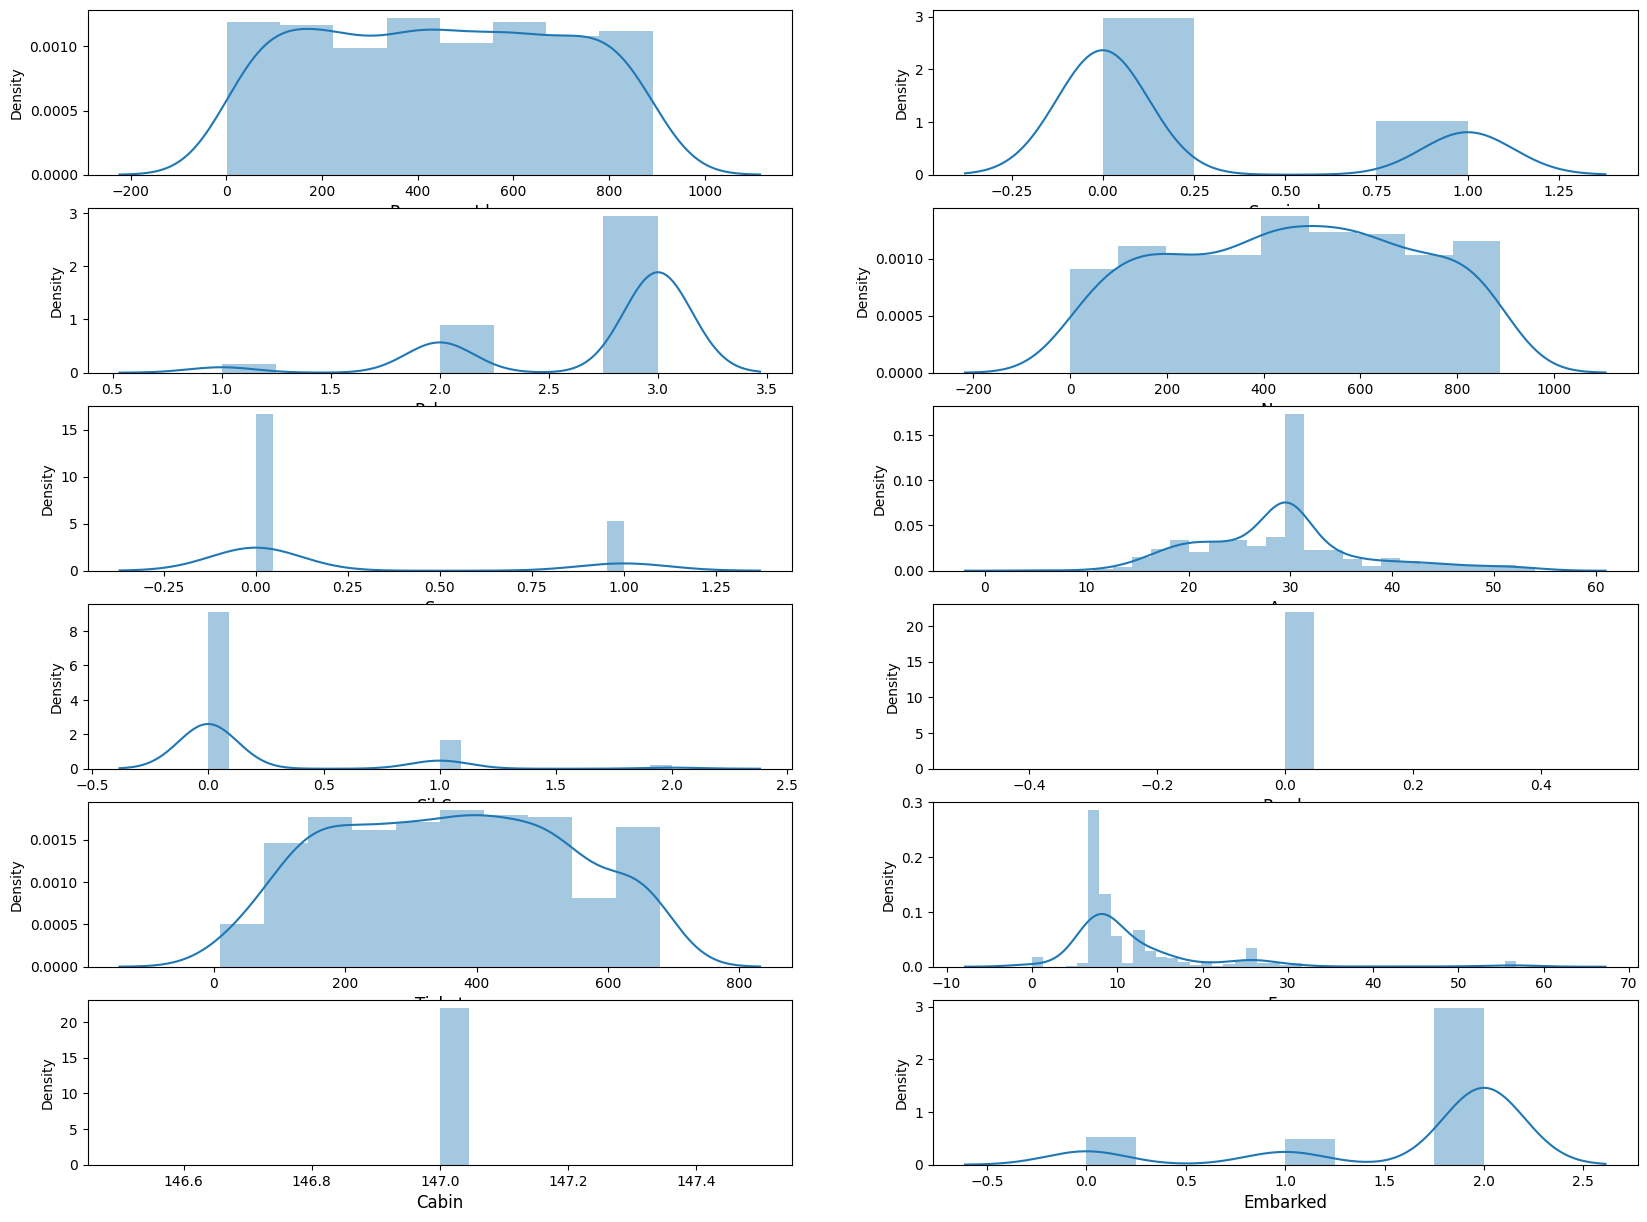

In [139]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.show()

In [140]:
x = df.drop(columns='Survived')

y = df['Survived']

In [141]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [142]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [144]:
vif = pd.DataFrame()

vif['Features'] = x.columns

vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif

,Features,vif
0,PassengerId,1.041905
1,Pclass,1.457404
2,Name,1.020915
3,Sex,1.069580
4,Age,1.087466
5,SibSp,1.178566
6,Parch,NaN
7,Ticket,1.190201
8,Fare,1.506414
9,Cabin,NaN


In [145]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.15)

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
lr = LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [148]:
lr_pred = lr.predict(x_test)

In [149]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [150]:
Accuracy = accuracy_score(y_test,lr_pred)

Accuracy

0.7733333333333333

In [151]:
Confusion_matrix = confusion_matrix(y_test,lr_pred)

Confusion_matrix

array([[47,  8],
       [ 9, 11]])

In [152]:
lr_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [153]:
len(lr_pred)

75